### Problem is to build a ML to preict online payment fraud

#### Step 1 a) Data import all necessary libraries, b) Laod or read data c) carry out EDA on the data set (bivariate and multivariate analysis, d) Select features and targer set, e) import necassary ML ect and Train and Test model, f) predict, g) make recommendation

In [2]:
# import the neccessary libraries 
import numpy as np
import pandas as pd

# import visuals Python Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading and reading a dataset
# For Excel you will do the following 'df = pd.read_excel(r'')'

Blossom_df = pd.read_csv(r'C:\Users\Esabu\OneDrive\Documents\Data Analysis Projects\Online Payment Fraud Detection.csv', encoding='ISO-8859-1')


In [4]:
Blossom_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [5]:
Blossom_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [111]:
Blossom_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [7]:
Blossom_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [8]:
Blossom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
# select all transactions that are fraudulent
Fraudulent_transaction = Blossom_df[Blossom_df['isFraud'] == 1]
Fraudulent_transaction.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [10]:
Blossom_df.shape

(1048575, 10)

In [11]:
# we want to do summary statistics with describe()
Blossom_df.describe().astype('int')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [12]:
### Check for Missing Data and Clean up and Identify groups within a category - 'type' to enhance evaluation

In [13]:
Blossom_df.isna().sum()

# Below we have missing values in description and customer ID

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<Axes: title={'center': 'Visualizing Missing Values'}>

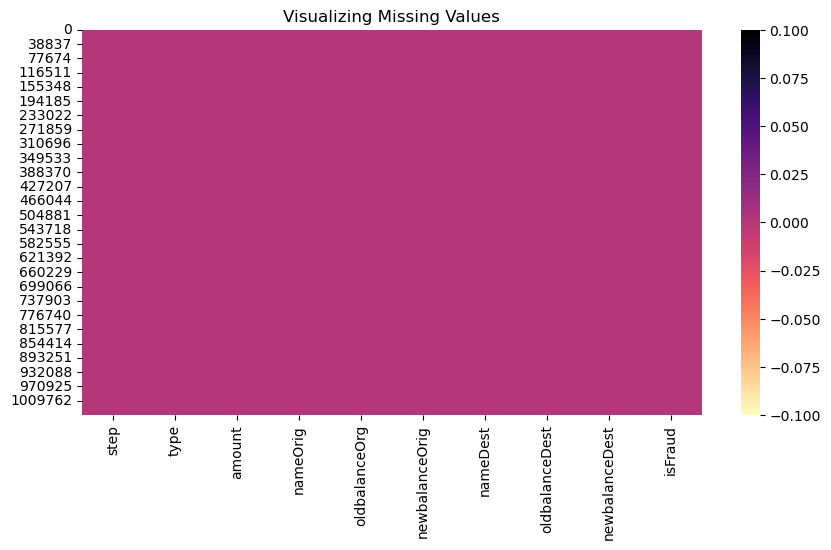

In [14]:
plt.figure(figsize = (10, 5))
plt.title('Visualizing Missing Values')
sns.heatmap(Blossom_df.isnull(), cbar = True, cmap = 'magma_r')

In [15]:
# How many types of transactions are there?
# First we need to see the transaction types

count_transaction_types = Blossom_df['type'].value_counts()
count_transaction_types

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

Text(0.5, 1.0, 'Visualizing Transaction Types')

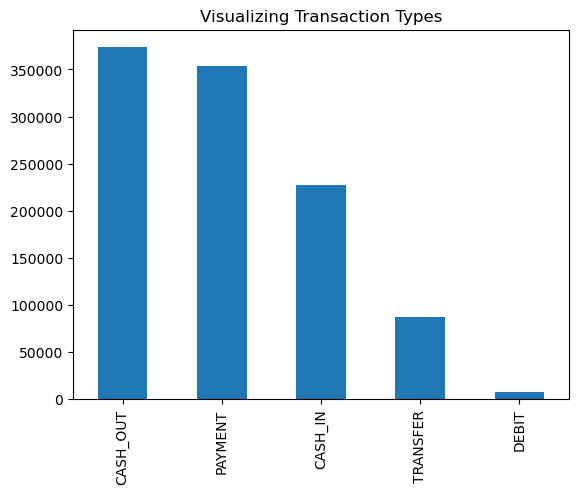

In [16]:
count_transaction_types.plot.bar()
plt.title('Visualizing Transaction Types')

<Axes: xlabel='type', ylabel='amount'>

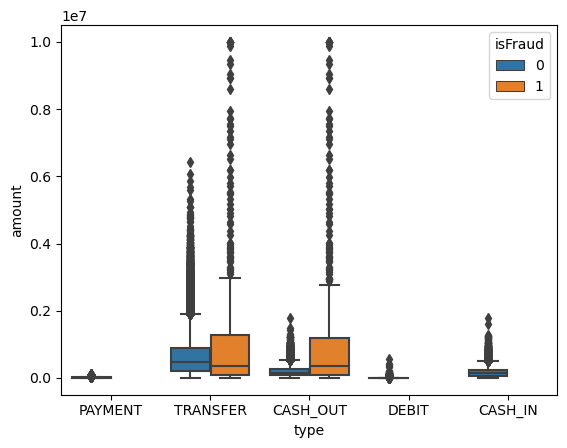

In [17]:
sns.boxplot(x='type', y='amount', hue='isFraud', data=Blossom_df)

In [100]:
# count the number of occurrences of isFraud in a Pandas DataFrame
Blossom_df['isFraud'].value_counts()


0    1047433
1       1142
Name: isFraud, dtype: int64

In [18]:
# Percentatage of Fraudenlent transaction.

Fraud_percent = (Blossom_df['isFraud'].value_counts()/Blossom_df.shape[0]*100).round(2)
Fraud_percent

0    99.89
1     0.11
Name: isFraud, dtype: float64

#### From the about we notice that Transfers and Cash_out were the only transaction type that were prone to fraud, and a significant amount of such fraudulent transaction were observed ie less that 0.2%. We will proceed to evaluate to see exactly were those fraudulent transaction were more privalent either in the 'nameOrig' or the 'nameDest' account. 

In [48]:
cols_to_select1 = ['type', 'amount', 'isFraud']
Blossom_df[cols_to_select1].groupby('type')['amount', 'isFraud'].sum()

C:\Users\Esabu\AppData\Local\Temp\ipykernel_13980\937155925.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Blossom_df[cols_to_select1].groupby('type')['amount', 'isFraud'].sum()


,amount,isFraud
type,,
CASH_IN,3.859476e+10,0
CASH_OUT,6.876474e+10,578
DEBIT,4.219599e+07,0
PAYMENT,3.936097e+09,0
TRANSFER,5.503644e+10,564


In [ ]:
Fraud_percent = (Blossom_df['isFraud'].value_counts()/Blossom_df.shape[0]*100).round(2)
Fraud_percent

#### List of objects in the data set - tpye (payment, cash out etc); nameOrig (name of costumer that origunated transaction); nameDest (receipent of the transaction)

### STEP TWO 

Perform Exploratory Data Analysis (EDA)
Visualize relationships between the label and some key features using seaborn as sns.countplot(x='isFraud', data=data)
Explore correlations between the variables using heatmap
Conduct Univariete analysis showing the distribution of the target variable using countplot
Conduct Multivariete analysis showing the relationship between some of the variables using boxplot and pairplot

In [95]:
Blossom_df['type'].value_counts()


CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

<Axes: xlabel='isFraud', ylabel='count'>

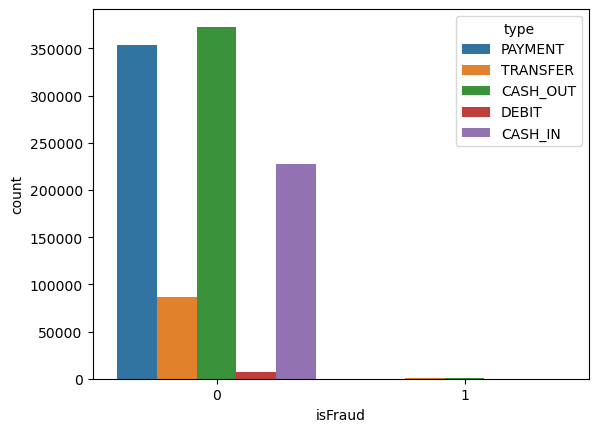

In [96]:
sns.countplot (data = Blossom_df, x = 'isFraud', hue = 'type' )

In [97]:
#### From the countplot above it is clear that fraud occured only in the following transaction tpyes - Transfer and Cash-Out.

<Axes: xlabel='type', ylabel='count'>

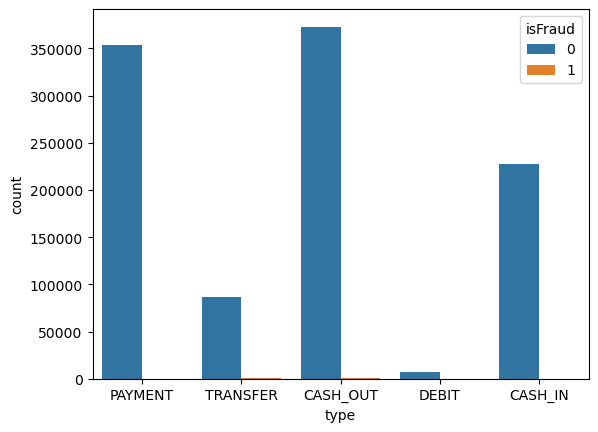

In [98]:
sns.countplot (data = Blossom_df, x = 'type', hue = 'isFraud')

<Axes: xlabel='type', ylabel='amount'>

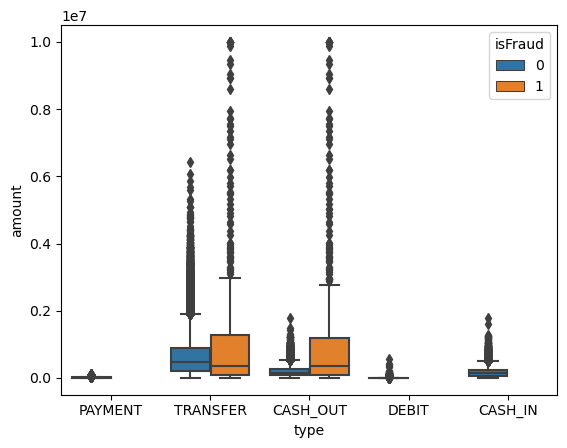

In [99]:
sns.boxplot(x='type', y='amount', hue='isFraud', data=Blossom_df)

In [101]:
# I want to create a new dataframe that capture's transaction type, nameOrig, nameDest and isFraud and perform some basic vitualiztion and call it Blossom_Cat

Blossom_cat = Blossom_df[['type', 'nameOrig', 'nameDest', 'isFraud']]

Blossom_cat.head()



,type,nameOrig,nameDest,isFraud
0,PAYMENT,C1231006815,M1979787155,0
1,PAYMENT,C1666544295,M2044282225,0
2,TRANSFER,C1305486145,C553264065,1
3,CASH_OUT,C840083671,C38997010,1
4,PAYMENT,C2048537720,M1230701703,0


In [102]:
Blossom_cat.describe

<bound method NDFrame.describe of              type     nameOrig     nameDest  isFraud
0         PAYMENT  C1231006815  M1979787155        0
1         PAYMENT  C1666544295  M2044282225        0
2        TRANSFER  C1305486145   C553264065        1
3        CASH_OUT   C840083671    C38997010        1
4         PAYMENT  C2048537720  M1230701703        0
...           ...          ...          ...      ...
1048570  CASH_OUT  C1179511630   C435674507        0
1048571   PAYMENT  C1956161225   M668364942        0
1048572   PAYMENT  C2037964975  M1355182933        0
1048573   PAYMENT  C1633237354  M1964992463        0
1048574   PAYMENT  C1264356443   M677577406        0

[1048575 rows x 4 columns]>

In [ ]:
### Analyze the of fraudulent transactions by type: number and sum of such transaction and the ratio compared to total transactions

In [103]:
fraud_amount_by_type = Fraudulent_transaction.groupby('type')['amount'].sum()
fraud_amount_by_type

type
CASH_OUT    6.803839e+08
TRANSFER    6.815984e+08
Name: amount, dtype: float64

In [104]:
Blossom_df.groupby('type')['amount'].sum()

type
CASH_IN     3.859476e+10
CASH_OUT    6.876474e+10
DEBIT       4.219599e+07
PAYMENT     3.936097e+09
TRANSFER    5.503644e+10
Name: amount, dtype: float64

In [105]:
Blossom_df['amount'].sum()

166374223863.37

In [106]:
# calculate the total amount of money transferred for each transaction type
amount_by_type = Blossom_df.groupby('type')['amount'].sum()
amount_by_type


type
CASH_IN     3.859476e+10
CASH_OUT    6.876474e+10
DEBIT       4.219599e+07
PAYMENT     3.936097e+09
TRANSFER    5.503644e+10
Name: amount, dtype: float64

In [61]:
type_df = Blossom_df[['type', 'isFraud', 'amount']]
type_df


,type,isFraud,amount
0,PAYMENT,0,9839.64
1,PAYMENT,0,1864.28
2,TRANSFER,1,181.00
3,CASH_OUT,1,181.00
4,PAYMENT,0,11668.14
...,...,...,...
1048570,CASH_OUT,0,132557.35
1048571,PAYMENT,0,9917.36
1048572,PAYMENT,0,14140.05
1048573,PAYMENT,0,10020.05


In [62]:
### From the dataset, it is clear that fraud occured only on Transfer and Cash-out transaction types. 

In [63]:
type_df.tail()

,type,isFraud,amount
1048570,CASH_OUT,0,132557.35
1048571,PAYMENT,0,9917.36
1048572,PAYMENT,0,14140.05
1048573,PAYMENT,0,10020.05
1048574,PAYMENT,0,11450.03


In [64]:
Blossom_df['type'].value_counts()


CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [65]:
Blossom_df.groupby('type')['isFraud'].count()


type
CASH_IN     227130
CASH_OUT    373641
DEBIT         7178
PAYMENT     353873
TRANSFER     86753
Name: isFraud, dtype: int64

In [66]:
Blossom_df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [67]:
cols_to_select = ['type', 'isFraud']
Blossom_df[cols_to_select].groupby('type')['isFraud'].sum()



type
CASH_IN       0
CASH_OUT    578
DEBIT         0
PAYMENT       0
TRANSFER    564
Name: isFraud, dtype: int64

In [68]:
percent_cash_out = round((Fraudulent_transaction[Fraudulent_transaction['type'] == 'CASH_OUT']['amount'].sum() / Blossom_df['amount'].sum()) * 100, 4)

percent_cash_out


0.4089

In [69]:
percent_transfer = round((Fraudulent_transaction[Fraudulent_transaction['type'] == 'TRANSFER']['amount'].sum() / Blossom_df['amount'].sum()) * 100, 4)

percent_transfer

0.4097

### VITUALIZATION - 

I begin with pairplot and heatmap to help me understand what are the core relationship at quick glance to enable more focused analysis. 

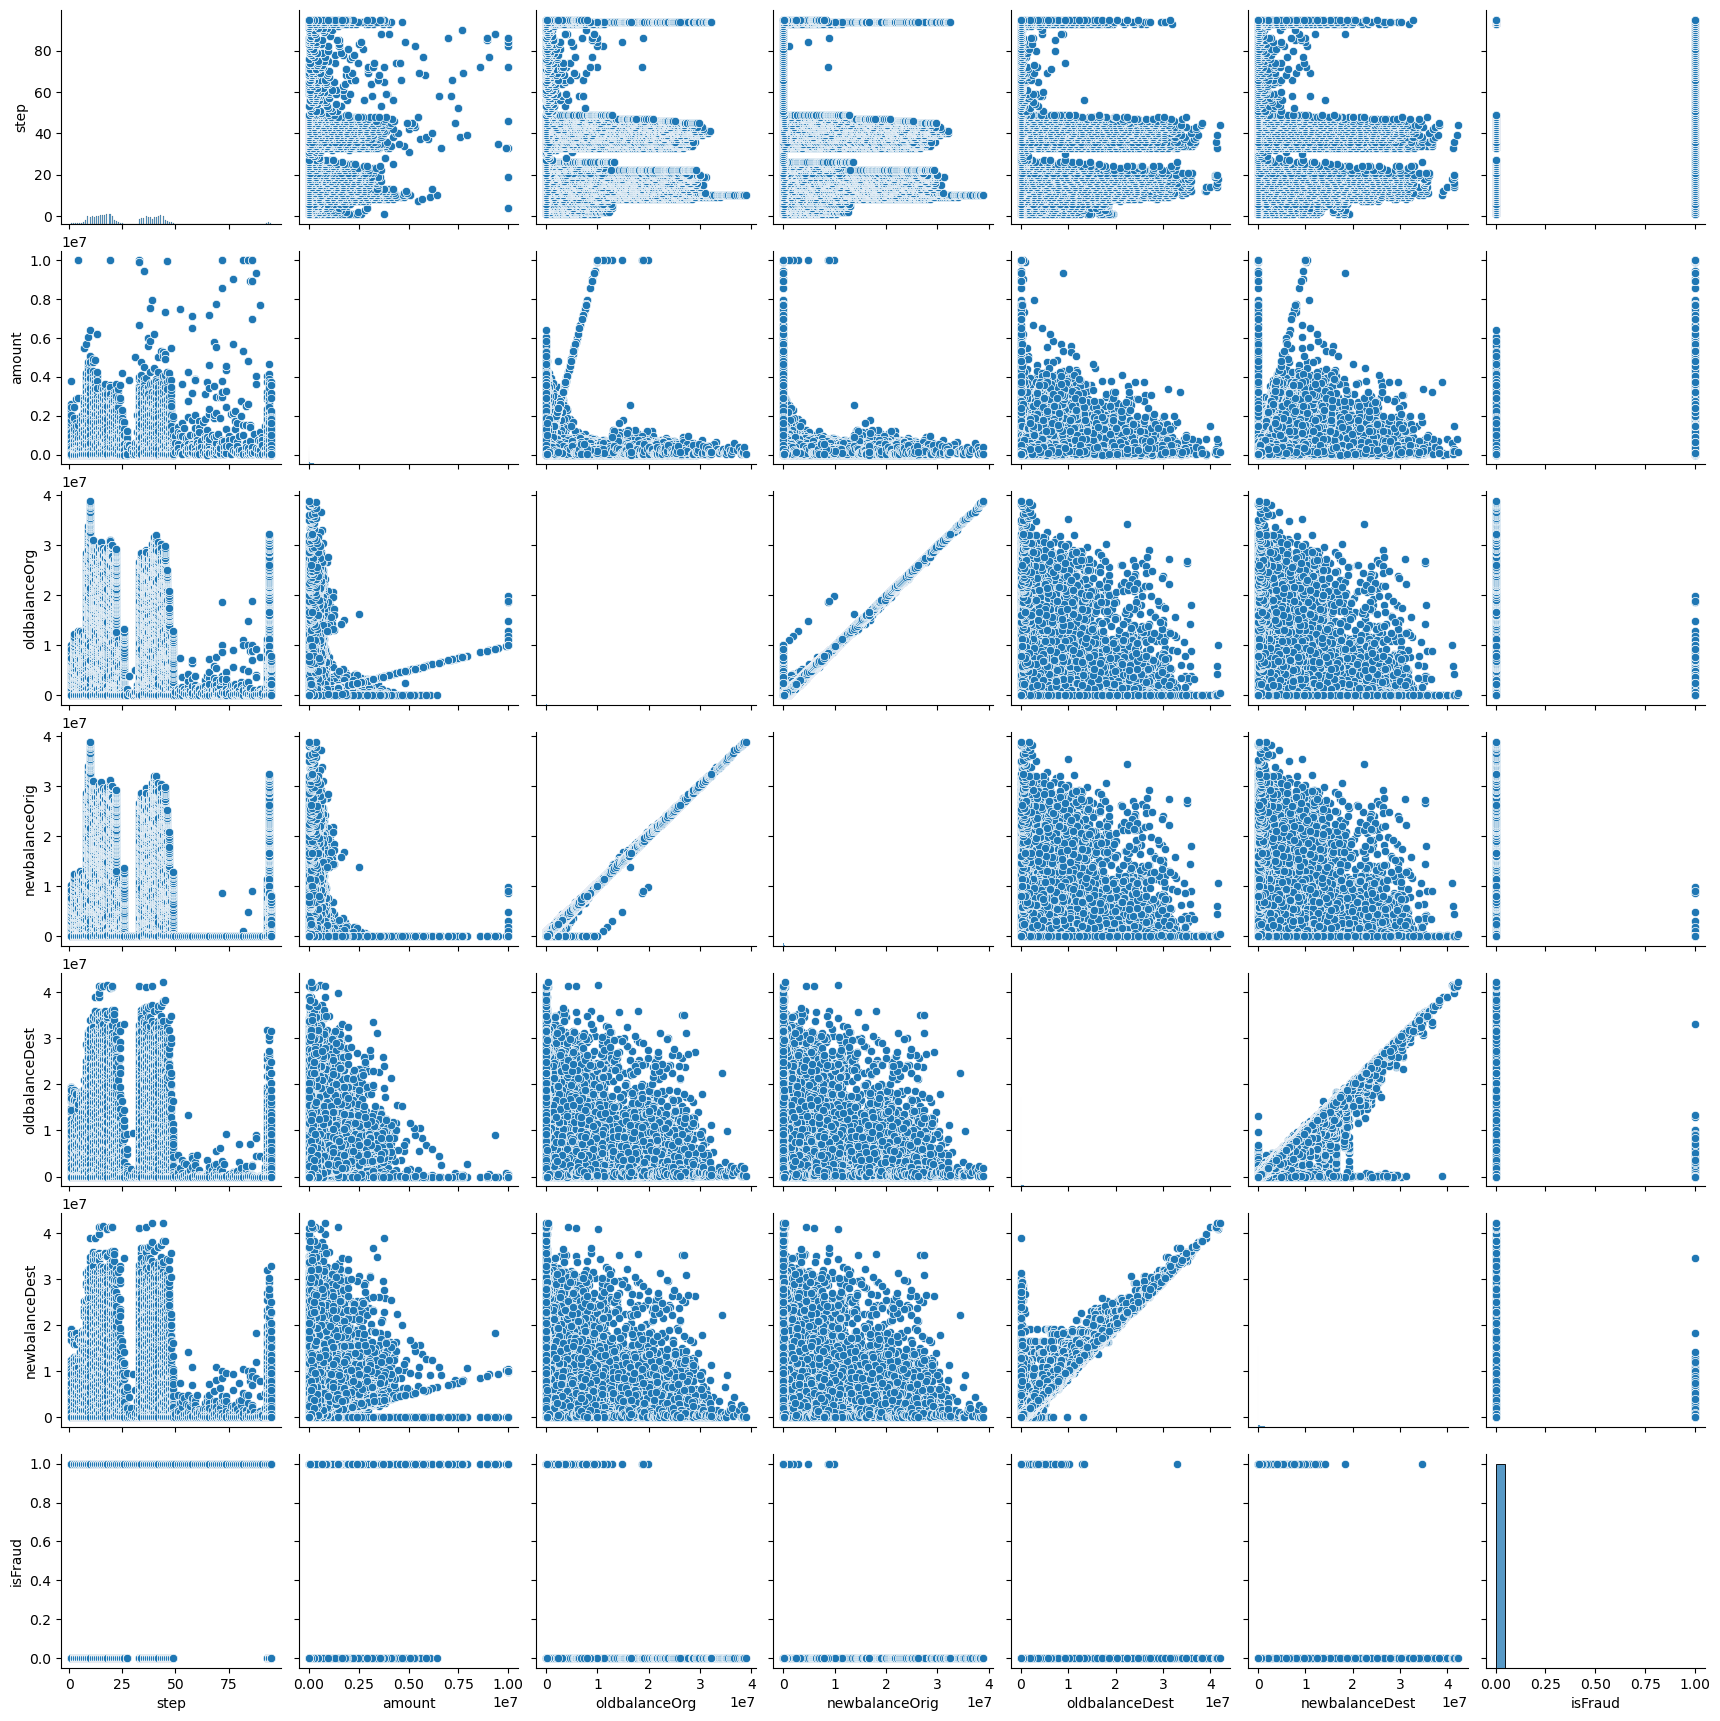

In [117]:
#Pair plot captures the relationship between two features. It captures the entire columns 
sns.pairplot(Blossom_df)

C:\Users\Esabu\AppData\Local\Temp\ipykernel_2248\2332414667.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel = Blossom_df.corr()


Text(0.5, 1.0, 'Heat Map Chart For Blossom Bank Dataset')

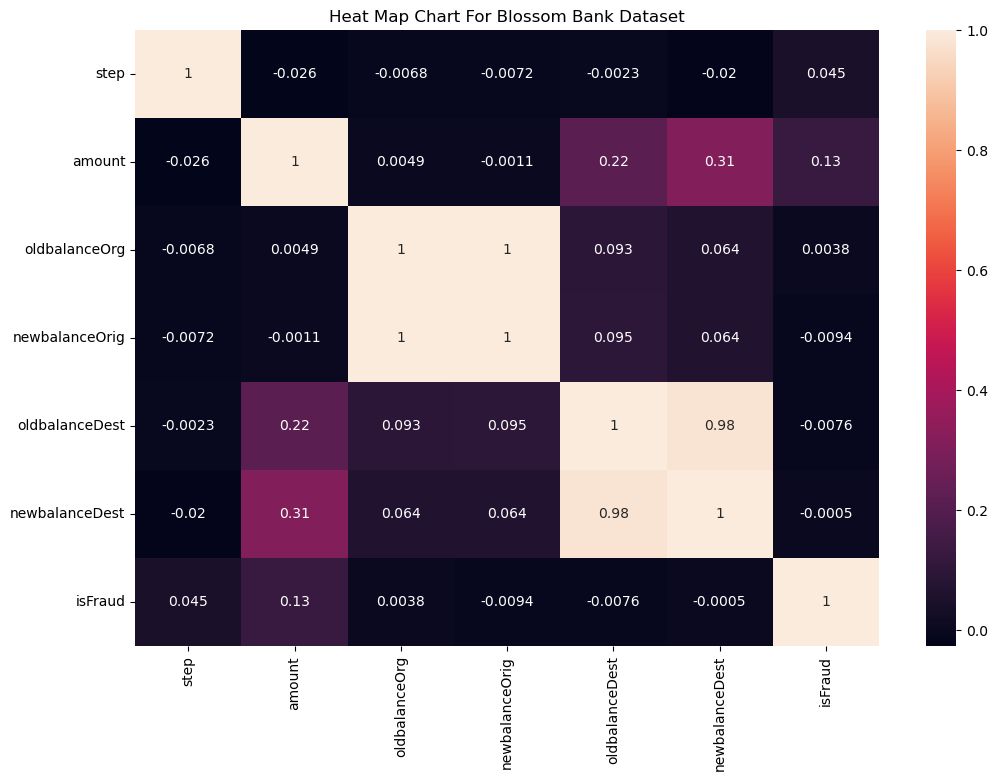

In [118]:
plt.figure(figsize = (12, 8))
corel = Blossom_df.corr()
sns.heatmap(corel, annot = True)
plt.title('Heat Map Chart For Blossom Bank Dataset')

<Axes: xlabel='isFraud', ylabel='count'>

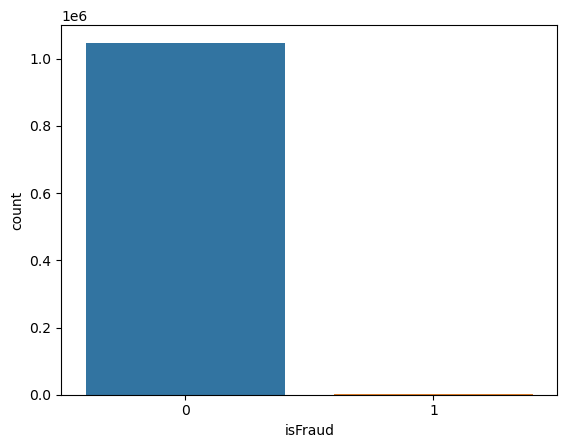

In [72]:
sns.countplot(x='isFraud', data=Blossom_df)

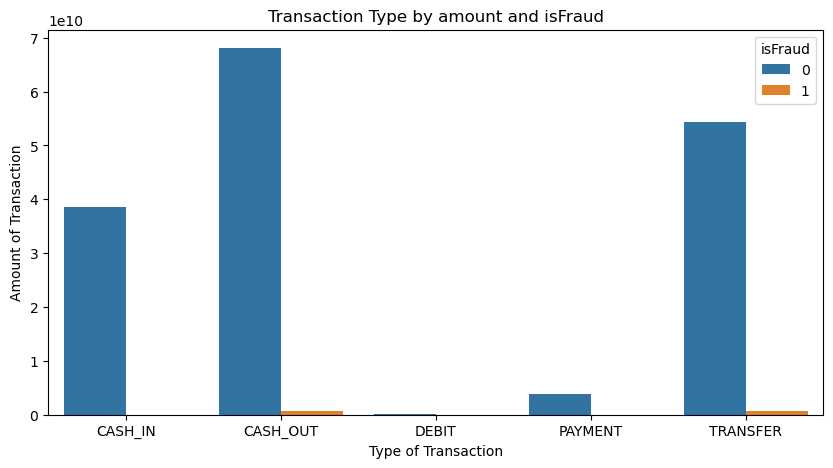

In [74]:
# Calculate fraud_amount_by_type
fraud_amount_by_type = Blossom_df.groupby(['type', 'isFraud'])['amount'].sum().reset_index()

# Plot the barplot
plt.figure(figsize=(10, 5))
plt.title('Transaction Type by amount and isFraud')
sns.barplot(x=fraud_amount_by_type['type'], y=fraud_amount_by_type['amount'], hue=fraud_amount_by_type['isFraud'])
plt.xlabel('Type of Transaction')
plt.ylabel('Amount of Transaction')
plt.show()


In [76]:
Blossom_df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [77]:
# separated target from dataset
y = Blossom_df["isFraud"]
X = Blossom_df.drop(["isFraud", "nameOrig", "nameDest"], axis=1)


In [78]:
# encoding categorical variables
X = pd.get_dummies(X)
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,1,0


In [79]:
y

0          0
1          0
2          1
3          1
4          0
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: isFraud, Length: 1048575, dtype: int64

###  Model Testing and Training

In [80]:
from sklearn.model_selection import train_test_split

In [81]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)

In [82]:
print('\n', X_train.head())
print('\n', y_train.head())
print('\n', X_test.head())
print('\n', y_test.head())


         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
944297    43   14289.14        93723.0        79433.86       454369.55   
831978    41   22381.74            0.0            0.00            0.00   
870214    42   76579.80        20954.0            0.00            0.00   
606842    34  364012.39        39826.0            0.00       794775.09   
927094    43   15873.98            0.0            0.00            0.00   

        newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
944297       468658.69             0              1           0             0   
831978            0.00             0              0           0             1   
870214        26885.94             0              1           0             0   
606842      1221909.34             0              1           0             0   
927094            0.00             0              0           0             1   

        type_TRANSFER  
944297              0  
831978            

### Model 1 DecisionTree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
DC_model = DecisionTreeClassifier()

In [85]:
DC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
DC_preds = DC_model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
print(accuracy_score(DC_preds, y_test))

0.9995199842325947


### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
RF_model = RandomForestClassifier()

In [91]:
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
RF_preds = RF_model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
print(accuracy_score(RF_preds, y_test))

0.9997647604848477


### Confussion Matrix

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Ml Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# Ml Metrics
from sklearn.metrics import accuracy_score, classification_report

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### We now want to split it into training and validation set using 20% of the data set

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [99]:
models = [DC_model, RF_model,]

In [100]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'white',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predicting on the fitted model
    # Print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) 
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.9995946880289918 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209486
           1       0.80      0.83      0.82       229

    accuracy                           1.00    209715
   macro avg       0.90      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



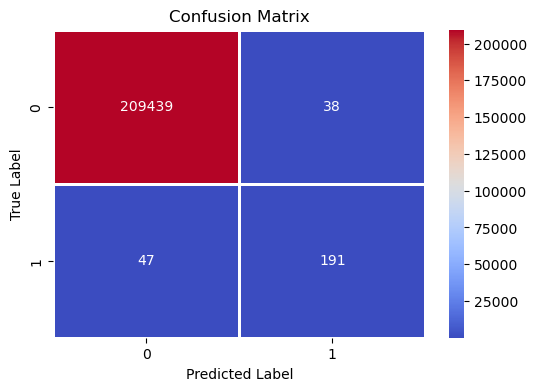


 ForRandomForestClassifier, Accuracy Score is 0.999766349569654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209522
           1       0.80      0.99      0.89       193

    accuracy                           1.00    209715
   macro avg       0.90      0.99      0.94    209715
weighted avg       1.00      1.00      1.00    209715



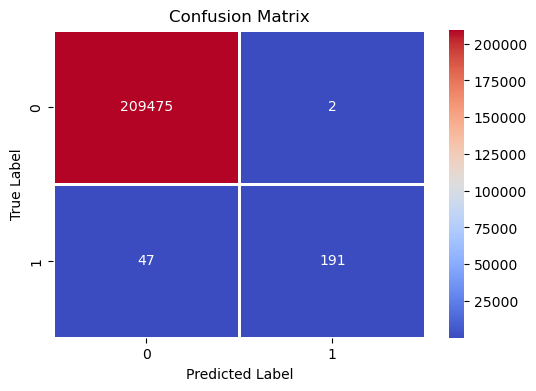

In [103]:
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

### OBSERVATION AND RECOMMENDATION

1. RandomForestClassifier model had better prediction as only 2 instances were incorectly predicted as positive compared to 38 of DecisionTreeClasssifier model

2. There is an insignificant difference in terms of model accuracy in both models RF - 0.9998 and DC - 0.9996

3.. Both models had equaly ability to identify positive instances - same Recall and f1 score.



INTERPRETING CONFUSION MATRIX

True Positive (TP): The number of instances that were actually positive and were correctly predicted as positive.
False Negative (FN): The number of instances that were actually positive but were incorrectly predicted as negative.
False Positive (FP): The number of instances that were actually negative but were incorrectly predicted as positive.
True Negative (TN): The number of instances that were actually negative and were correctly predicted as negative.
Interpreting the confusion matrix allows you to gain insights into the performance of your classification model:

Accuracy: It is the overall correctness of the model and can be calculated as (TP + TN) / (TP + TN + FP + FN). It measures the proportion of correctly classified instances.

Precision: It indicates the proportion of correctly predicted positive instances out of the total instances predicted as positive and can be calculated as TP / (TP + FP). It measures the model's ability to avoid false positives.

Recall (Sensitivity or True Positive Rate): It indicates the proportion of correctly predicted positive instances out of the total actual positive instances and can be calculated as TP / (TP + FN). It measures the model's ability to identify positive instances.

Specificity (True Negative Rate): It indicates the proportion of correctly predicted negative instances out of the total actual negative instances and can be calculated as TN / (TN + FP). It measures the model's ability to identify negative instances.

F1 Score: It is the harmonic mean of precision and recall and provides a balanced measure of both. It can be calculated as 2 * (Precision * Recall) / (Precision + Recall).

Analyzing the values in the confusion matrix and the derived metrics helps you understand the strengths and weaknesses of your classification model, identify any patterns of misclassification, and make improvements if necessary